In [1]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import collections

In [4]:
page = requests.get("https://wuzzuf.net/search/jobs/?a=navbl&filters%5Bcountry%5D%5B0%5D=Egypt&q=analysis")
print(page)

<Response [200]>


In [5]:
src = page.content

In [6]:
soup = BeautifulSoup(src, "lxml")

In [7]:
jobs = soup.find_all("div", {"class" : "css-pkv5jc"})
len(jobs)

15

In [8]:
job_name = jobs[0].find_all("h2", {"class" : "css-m604qf"})[0].text
job_name

'Sr. Software Business Analysis'

In [9]:
campany_location = jobs[3].find_all("span", {"class" : "css-5wys0k"})[0].text
campany_location

'Heliopolis, Cairo, Egypt '

In [10]:
job_type = jobs[14].find_all("span", {"class" : "css-1ve4b75 eoyjyou0"})[0].text
job_type

'Full Time'

In [11]:
exp_level = jobs[13].find_all("div", {"class" : "css-1lh32fc"})[0].next_sibling.text.split(" · ")[0]
exp_level

'Experienced'

In [12]:
exp_year = jobs[13].find_all("div", {"class" : "css-1lh32fc"})[0].next_sibling.text.split(" · ")[1]
exp_year

'2 - 5 Yrs of Exp'

In [13]:

skills = jobs[13].find_all("div", {"class" : "css-1lh32fc"})[0].next_sibling.text.split(" · ")[2:]
",".join(skills)

'Operations/Management,Analyst/Research,Sales/Retail,Analyzing data,business,Communication skills,systems analysis,Data visualization,Data,Business Analysis'

In [14]:
data = pd.DataFrame(columns = ["Job title", "Company name", "Location", "Job type", "Exp level", "Exp years", "Skills"])
data

,Job title,Company name,Location,Job type,Exp level,Exp years,Skills


In [15]:
for job in jobs:
    job_name =  job.find_all("h2", {"class" : "css-m604qf"})[0].text
    
    company_name = job.find_all("a", {"class" : "css-17s97q8"})[0].text
    
    location = job.find_all("span", {"class" : "css-5wys0k"})[0].text
    
    job_type =  job.find_all("span", {"class" : "css-1ve4b75 eoyjyou0"})[0].text
    
    exp_level = job.find_all("div", {"class" : "css-1lh32fc"})[0].next_sibling.text.split(" · ")[0]
    
    exp_years = job.find_all("div", {"class" : "css-1lh32fc"})[0].next_sibling.text.split(" · ")[1]
    
    skills = ",".join(job.find_all("div", {"class" : "css-1lh32fc"})[0].next_sibling.text.split(" · ")[2:])
    
    data.loc[len(data.index)] = [job_name, company_name, location, job_type, exp_level, exp_years, skills]

In [16]:
data

,Job title,Company name,Location,Job type,Exp level,Exp years,Skills
0,Sr. Software Business Analysis,Safa Soft -,"Maadi, Cairo, Egypt",Full Time,Experienced,3 - 6 Yrs of Exp,"Analyst/Research,Analysis,Business Analysis,Co..."
1,Financial Planning & Analysis Senior Analyst,Confidential -,"Cairo, Egypt",Full Time,Experienced,3 - 5 Yrs of Exp,"Accounting/Finance,Banking,Manufacturing/Produ..."
2,Financial Planning And Analysis ( FP & A ),Mafad Contracting Company -,"Alexandria, Egypt",Full Time,Experienced,7 - 10 Yrs of Exp,"Accounting/Finance,Operations/Management,Analy..."
3,Financial Planning and Analysis,Cleopatra Hospitals Group -,"Heliopolis, Cairo, Egypt",Full Time,Experienced,2 - 4 Yrs of Exp,"Accounting/Finance,Financial Data,analytical,F..."
4,Data Analysis/Analytics Instructor (Excel - Po...,EpsilonAI -,"Nasr City, Cairo, Egypt",Full Time,Experienced,1+ Yrs of Exp,"IT/Software Development,Analyst/Research,Train..."
5,Senior Financial Planning and Analysis Specialist,Ibn Sina Pharma -,"Maadi, Cairo, Egypt",Full Time,Experienced,3 - 5 Yrs of Exp,"Accounting/Finance,Business Development,Analys..."
6,Scrum Master with Business Analysis Expertise,Bydotpy -,"New Cairo, Cairo, Egypt",Full Time,Experienced,3 - 5 Yrs of Exp,"Business Development,IT/Software Development,P..."
7,•\tCorporate Financial Budget Controller / Pla...,شركه طنطا موتورز -,"Nasr City, Cairo, Egypt",Full Time,Manager,15 - 20 Yrs of Exp,"Accounting/Finance,Accounting,Finance,Manufact..."
8,Financial Planning & Analysis Manager,Al monairy -,"10th of Ramadan City, Sharqia, Egypt",Full Time,Manager,10 - 15 Yrs of Exp,"Accounting/Finance,Operations/Management,Analy..."
9,Group Financial Planning & Analysis Manager,Vision Cosmetics -,"Nasr City, Cairo, Egypt",Full Time,Manager,7 - 15 Yrs of Exp,"Accounting/Finance,Business Development,Analys..."


In [17]:
for pageIndex in range(108):
    # request page base index
    page = requests.get(f"https://wuzzuf.net/search/jobs/?a=navbl&filters%5Bcountry%5D%5B0%5D=Egypt&q=analysis&start={pageIndex}")
    
    # get page content
    src = page.content
    
    # parse content of page
    soup = BeautifulSoup(src, "lxml")
    
    # get all jobs in page
    jobs = soup.find_all("div", {"class" : "css-pkv5jc"})
    
    # loop of each page to extracte data
    for job in jobs:
        job_name =  job.find_all("h2", {"class" : "css-m604qf"})[0].text

        company_name = job.find_all("a", {"class" : "css-17s97q8"})[0].text

        location = job.find_all("span", {"class" : "css-5wys0k"})[0].text

        job_type =  job.find_all("span", {"class" : "css-1ve4b75 eoyjyou0"})[0].text

        exp_level = job.find_all("div", {"class" : "css-1lh32fc"})[0].next_sibling.text.split(" · ")[0]

        exp_years = job.find_all("div", {"class" : "css-1lh32fc"})[0].next_sibling.text.split(" · ")[1]

        skills = ",".join(job.find_all("div", {"class" : "css-1lh32fc"})[0].next_sibling.text.split(" · ")[2:])
        
        # Add each iteration of inner loop to data frame as row
        data.loc[len(data.index)] = [job_name, company_name, location, job_type, exp_level, exp_years, skills]
        
    # Add condition to check requests still work or not
    if pageIndex % 20 == 0:
        print(f"Succeeded Scraping {pageIndex} pages, Requests still work")

Succeeded Scraping 0 pages, Requests still work
Succeeded Scraping 20 pages, Requests still work
Succeeded Scraping 40 pages, Requests still work
Succeeded Scraping 60 pages, Requests still work
Succeeded Scraping 80 pages, Requests still work
Succeeded Scraping 100 pages, Requests still work


In [18]:
data

,Job title,Company name,Location,Job type,Exp level,Exp years,Skills
0,Sr. Software Business Analysis,Safa Soft -,"Maadi, Cairo, Egypt",Full Time,Experienced,3 - 6 Yrs of Exp,"Analyst/Research,Analysis,Business Analysis,Co..."
1,Financial Planning & Analysis Senior Analyst,Confidential -,"Cairo, Egypt",Full Time,Experienced,3 - 5 Yrs of Exp,"Accounting/Finance,Banking,Manufacturing/Produ..."
2,Financial Planning And Analysis ( FP & A ),Mafad Contracting Company -,"Alexandria, Egypt",Full Time,Experienced,7 - 10 Yrs of Exp,"Accounting/Finance,Operations/Management,Analy..."
3,Financial Planning and Analysis,Cleopatra Hospitals Group -,"Heliopolis, Cairo, Egypt",Full Time,Experienced,2 - 4 Yrs of Exp,"Accounting/Finance,Financial Data,analytical,F..."
4,Data Analysis/Analytics Instructor (Excel - Po...,EpsilonAI -,"Nasr City, Cairo, Egypt",Full Time,Experienced,1+ Yrs of Exp,"IT/Software Development,Analyst/Research,Train..."
...,...,...,...,...,...,...,...
1630,Mechanical Design Engineer Low and Medium volt...,ARC Technologies -,"Abu Rawash, Giza, Egypt",Full Time,Entry Level,3 - 6 Yrs of Exp,"Engineering - Mechanical/Electrical,Microsoft ..."
1631,Graphic Designer and video editor,Some Skin Care -,"Cairo, Egypt",Full Time,Experienced,1 - 3 Yrs of Exp,"Creative/Design/Art,Adobe illustrator,Design,G..."
1632,QC Finished Product Analyst,Rameda -,"6th of October, Giza, Egypt",Full Time,Experienced,1 - 3 Yrs of Exp,"Manufacturing/Production,Quality,Pharmaceutica..."
1633,Planning Engineer,Infracon -,"Heliopolis, Cairo, Egypt",Full Time,Experienced,5 - 10 Yrs of Exp,"Engineering - Construction/Civil/Architecture,..."


In [19]:
data.head(5)

,Job title,Company name,Location,Job type,Exp level,Exp years,Skills
0,Sr. Software Business Analysis,Safa Soft -,"Maadi, Cairo, Egypt",Full Time,Experienced,3 - 6 Yrs of Exp,"Analyst/Research,Analysis,Business Analysis,Co..."
1,Financial Planning & Analysis Senior Analyst,Confidential -,"Cairo, Egypt",Full Time,Experienced,3 - 5 Yrs of Exp,"Accounting/Finance,Banking,Manufacturing/Produ..."
2,Financial Planning And Analysis ( FP & A ),Mafad Contracting Company -,"Alexandria, Egypt",Full Time,Experienced,7 - 10 Yrs of Exp,"Accounting/Finance,Operations/Management,Analy..."
3,Financial Planning and Analysis,Cleopatra Hospitals Group -,"Heliopolis, Cairo, Egypt",Full Time,Experienced,2 - 4 Yrs of Exp,"Accounting/Finance,Financial Data,analytical,F..."
4,Data Analysis/Analytics Instructor (Excel - Po...,EpsilonAI -,"Nasr City, Cairo, Egypt",Full Time,Experienced,1+ Yrs of Exp,"IT/Software Development,Analyst/Research,Train..."


In [20]:
print("The number of rows in the dataset are " + str(data.shape[0]))

The number of rows in the dataset are 1635


In [21]:
print("The number of columns in the dataset are " + str(data.shape[1]))

The number of columns in the dataset are 7


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1635 entries, 0 to 1634
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Job title     1635 non-null   object
 1   Company name  1635 non-null   object
 2   Location      1635 non-null   object
 3   Job type      1635 non-null   object
 4   Exp level     1635 non-null   object
 5   Exp years     1635 non-null   object
 6   Skills        1635 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [23]:
unique_con = len(data)
print( "Number of Uniqe Values ", unique_con)

Number of Uniqe Values  1635


In [24]:
print("Number of Duplicated Terms ", data.duplicated().sum())

Number of Duplicated Terms  17


In [25]:
data.drop_duplicates(inplace = True)

In [26]:
print(data.duplicated().sum())

0


In [27]:
data.shape

(1618, 7)

In [28]:
unique_values, count = np.unique(data['Job type'], return_counts=True)

print("Number of unique values in Job type ", len(unique_values))

Number of unique values in Job type  4


In [29]:
missing_values = data.isnull()
for column in missing_values.columns.values.tolist():
    print(column)
    print(missing_values[column].value_counts())
    print("")

Job title
Job title
False    1618
Name: count, dtype: int64

Company name
Company name
False    1618
Name: count, dtype: int64

Location
Location
False    1618
Name: count, dtype: int64

Job type
Job type
False    1618
Name: count, dtype: int64

Exp level
Exp level
False    1618
Name: count, dtype: int64

Exp years
Exp years
False    1618
Name: count, dtype: int64

Skills
Skills
False    1618
Name: count, dtype: int64



In [30]:
least_freq = data['Skills'].value_counts().idxmin()
print(least_freq)

males_only,Engineering - Construction/Civil/Architecture,Engineering - Mechanical/Electrical,Engineering - Other,Civil,Civil Engineering,Construction,Cost Control,Cost Management,Project Management,Cost


In [31]:
data.describe

<bound method NDFrame.describe of                                               Job title  \
0                        Sr. Software Business Analysis   
1          Financial Planning & Analysis Senior Analyst   
2            Financial Planning And Analysis ( FP & A )   
3                       Financial Planning and Analysis   
4     Data Analysis/Analytics Instructor (Excel - Po...   
...                                                 ...   
1630  Mechanical Design Engineer Low and Medium volt...   
1631                  Graphic Designer and video editor   
1632                        QC Finished Product Analyst   
1633                                  Planning Engineer   
1634                           Technical Office Manager   

                       Company name                      Location   Job type  \
0                       Safa Soft -          Maadi, Cairo, Egypt   Full Time   
1                    Confidential -                 Cairo, Egypt   Full Time   
2     Mafad Contr

In [32]:
data['Job title'].unique()[:50]

array(['Sr. Software Business Analysis',
       'Financial Planning & Analysis Senior Analyst',
       'Financial Planning And Analysis ( FP & A )',
       'Financial Planning and Analysis',
       'Data Analysis/Analytics Instructor (Excel - Power BI)',
       'Senior Financial Planning and Analysis Specialist',
       'Scrum Master with Business Analysis Expertise',
       '•\tCorporate Financial Budget Controller / Planning & Analysis Manager',
       'Financial Planning & Analysis Manager',
       'Group Financial Planning & Analysis Manager',
       'QC Specialist - Instrumental Analysis/ Stability Analysis / Document Control',
       'Group Planning and Analysis Manager', 'Senior Credit Analyst',
       'Retail Business Analyst Specialist', 'Structural Engineer',
       'Treasury and Banks Accountant', 'Financial Analyst',
       'Marketing & Communication Manager', 'Market Research Analyst',
       'Pre Sales Engineer', 'CFO', 'Operations Specialist',
       'Software Business A

In [33]:
data['Job title'].value_counts()[:20]

Job title
Accountant                      54
Senior Accountant               27
General Accountant              25
Accounting Manager              25
Junior Accountant               17
Financial Analyst               15
Business Analyst                14
Cost Accountant                 12
Finance Manager                 12
Treasury Manager                10
Treasury Accountant             10
AP Accountant                    9
Chief Accountant                 9
Financial Manager                9
CFO                              8
Senior Tax Accountant            8
Data Analyst                     8
Quality Assurance Specialist     6
Electrical Engineer              6
Account Manager                  6
Name: count, dtype: int64

In [34]:
def remove_Brackets(title):
    
    return title.split('(')[0].strip()
     

def remove_VerticalLine(title):
    return title.split("|")[0]


def remove_hyphen(title):
    return title.split(" - ")[0]


def remove_and(title):
    return title.split(" & ")[0]
    
 
data["Job title"] = data["Job title"].apply(remove_Brackets)

 
data["Job title"] = data["Job title"].apply(remove_VerticalLine)


data["Job title"] = data["Job title"].apply(remove_hyphen)


data["Job title"] = data["Job title"].apply(remove_and)

In [35]:
data["Job title"].unique()[:50]

array(['Sr. Software Business Analysis', 'Financial Planning',
       'Financial Planning And Analysis',
       'Financial Planning and Analysis',
       'Data Analysis/Analytics Instructor',
       'Senior Financial Planning and Analysis Specialist',
       'Scrum Master with Business Analysis Expertise',
       '•\tCorporate Financial Budget Controller / Planning',
       'Group Financial Planning', 'QC Specialist',
       'Group Planning and Analysis Manager', 'Senior Credit Analyst',
       'Retail Business Analyst Specialist', 'Structural Engineer',
       'Treasury and Banks Accountant', 'Financial Analyst', 'Marketing',
       'Market Research Analyst', 'Pre Sales Engineer', 'CFO',
       'Operations Specialist', 'Software Business Analyst',
       'Business Analyst', 'Statistical Researcher', 'Audit Manager',
       'Senior Receivable Accountant', 'Raw Material Specialist',
       'Senior Accountant', 'Egypt FINANCE MANAGER', 'Cost Accountant',
       'Quality Control Section H

In [36]:

data["Job title"].value_counts()[:20]

Job title
Accountant               63
Senior Accountant        32
Accounting Manager       30
General Accountant       28
Junior Accountant        17
Financial Analyst        17
Finance Manager          14
Cost Accountant          14
Business Analyst         14
Chief Accountant         13
Treasury Manager         11
Data Analyst             10
Treasury Accountant      10
Financial Manager         9
AP Accountant             9
Senior Tax Accountant     8
CFO                       8
Account Manager           8
Product Owner             7
IT Manager                7
Name: count, dtype: int64

In [37]:
print(f" Number of unique values is : {data['Location'].nunique()}")
print("-" * 30)
print(data["Location"].unique()[:50])

 Number of unique values is : 85
------------------------------
['Maadi, Cairo, Egypt ' 'Cairo, Egypt ' 'Alexandria, Egypt '
 'Heliopolis, Cairo, Egypt ' 'Nasr City, Cairo, Egypt '
 'New Cairo, Cairo, Egypt ' '10th of Ramadan City, Sharqia, Egypt '
 '6th of October, Giza, Egypt ' 'Sheikh Zayed, Giza, Egypt '
 'Giza, Egypt ' 'Haram, Giza, Egypt ' 'Belbes, Sharqia, Egypt '
 'Dokki, Giza, Egypt ' 'San Stefano, Alexandria, Egypt '
 'Mohandessin, Giza, Egypt ' 'Abbassia, Cairo, Egypt '
 'Smart Village, Giza, Egypt ' 'Sheraton, Cairo, Egypt '
 'Bab Sharq, Alexandria, Egypt ' 'Madinaty, Cairo, Egypt '
 'Smouha, Alexandria, Egypt ' 'Obour City, Cairo, Egypt '
 'Downtown, Cairo, Egypt ' '10th of Ramadan City, Cairo, Egypt '
 'Ain Sokhna, Suez, Egypt ' 'New Capital, Cairo, Egypt '
 'Agouza, Giza, Egypt ' 'Boulaq, Cairo, Egypt '
 'Shorouk City, Cairo, Egypt ' 'Mokattam, Cairo, Egypt '
 'Helwan, Cairo, Egypt ' 'Luxor, Luxor, Egypt ' 'Aswan, Aswan, Egypt '
 'Katameya, Cairo, Egypt ' 'Sharqia, Egypt

In [38]:
data['Location'].value_counts()[:20]

Location
Cairo, Egypt                             517
New Cairo, Cairo, Egypt                  155
Nasr City, Cairo, Egypt                  105
6th of October, Giza, Egypt              104
Maadi, Cairo, Egypt                      102
Heliopolis, Cairo, Egypt                  73
Sheikh Zayed, Giza, Egypt                 53
Alexandria, Egypt                         41
Mohandessin, Giza, Egypt                  40
10th of Ramadan City, Sharqia, Egypt      36
Sheraton, Cairo, Egypt                    33
Obour City, Cairo, Egypt                  33
Dokki, Giza, Egypt                        27
Giza, Egypt                               27
10th of Ramadan City, Cairo, Egypt        27
Haram, Giza, Egypt                        15
Downtown, Cairo, Egypt                    13
Mokattam, Cairo, Egypt                    13
Smart Village, Giza, Egypt                12
Abu Rawash, Giza, Egypt                   12
Name: count, dtype: int64

In [39]:
def remove_country(country):
    return country.replace(", Egypt","").strip()
data['Location'] = data['Location'].apply(remove_country)

In [40]:
data['Location'].unique()[:50]

array(['Maadi, Cairo', 'Cairo', 'Alexandria', 'Heliopolis, Cairo',
       'Nasr City, Cairo', 'New Cairo, Cairo',
       '10th of Ramadan City, Sharqia', '6th of October, Giza',
       'Sheikh Zayed, Giza', 'Giza', 'Haram, Giza', 'Belbes, Sharqia',
       'Dokki, Giza', 'San Stefano, Alexandria', 'Mohandessin, Giza',
       'Abbassia, Cairo', 'Smart Village, Giza', 'Sheraton, Cairo',
       'Bab Sharq, Alexandria', 'Madinaty, Cairo', 'Smouha, Alexandria',
       'Obour City, Cairo', 'Downtown, Cairo',
       '10th of Ramadan City, Cairo', 'Ain Sokhna, Suez',
       'New Capital, Cairo', 'Agouza, Giza', 'Boulaq, Cairo',
       'Shorouk City, Cairo', 'Mokattam, Cairo', 'Helwan, Cairo',
       'Luxor, Luxor', 'Aswan, Aswan', 'Katameya, Cairo', 'Sharqia',
       'Shubra Alkhaymah, Qalubia', 'New Damietta, Damietta',
       'Manial, Cairo', 'Abu Rawash, Giza', 'Basatin, Cairo',
       'Alsadat City, Monufya', 'Gharbia', 'Bourj Alarab, Alexandria',
       'Sidi Bishr, Alexandria', 'Mansoura,

In [41]:
data['Job type'].unique()

array(['Full Time', 'Part Time', 'Internship', 'Freelance / Project'],
      dtype=object)

In [42]:
data['Job type'].replace("Freelance / Project", "Freelance", inplace = True)

In [43]:
data['Job type'].value_counts()

Job type
Full Time     1598
Part Time        7
Internship       7
Freelance        6
Name: count, dtype: int64

In [44]:
data['Exp level'].unique()

array(['Experienced', 'Manager', 'Senior Management', 'Entry Level',
       'Not specified', 'Student'], dtype=object)

In [45]:
data['Exp level'].value_counts()

Exp level
Experienced          847
Entry Level          294
Manager              228
Not specified        201
Senior Management     44
Student                4
Name: count, dtype: int64

In [46]:
data['Exp years'].unique()

array(['3 - 6 Yrs of Exp', '3 - 5 Yrs of Exp', '7 - 10 Yrs of Exp',
       '2 - 4 Yrs of Exp', '1+ Yrs of Exp', '15 - 20 Yrs of Exp',
       '10 - 15 Yrs of Exp', '7 - 15 Yrs of Exp', '1 - 3 Yrs of Exp',
       '7 - 9 Yrs of Exp', '2+ Yrs of Exp', '2 - 5 Yrs of Exp',
       '5 - 10 Yrs of Exp', '5 - 6 Yrs of Exp', '0 - 5 Yrs of Exp',
       '2 - 7 Yrs of Exp', '5+ Yrs of Exp', '5 - 7 Yrs of Exp',
       '5 - 8 Yrs of Exp', '3 - 7 Yrs of Exp', '4 - 6 Yrs of Exp',
       '7 - 12 Yrs of Exp', '7 - 20 Yrs of Exp', '1 - 2 Yrs of Exp',
       '0 - 3 Yrs of Exp', '1 - 4 Yrs of Exp', '3+ Yrs of Exp',
       '3 - 8 Yrs of Exp', '0 - 1 Yrs of Exp', 'Customer Service/Support',
       '8 - 12 Yrs of Exp', '2 - 3 Yrs of Exp', '2 - 6 Yrs of Exp',
       '8 - 10 Yrs of Exp', '6 - 11 Yrs of Exp', '10+ Yrs of Exp',
       '8+ Yrs of Exp', '10 - 20 Yrs of Exp', '17 - 20 Yrs of Exp',
       '15 - 18 Yrs of Exp', '3 - 4 Yrs of Exp', '7+ Yrs of Exp',
       '4 - 5 Yrs of Exp', '1 - 5 Yrs of Exp', 'males_on

In [47]:
def extract_numiric_values(value):
      return re.sub(r"[^0-9-]", "", value)
    
data["Exp years"] = data["Exp years"].apply(extract_numiric_values)

In [48]:
data['Exp years'].unique()

array(['3-6', '3-5', '7-10', '2-4', '1', '15-20', '10-15', '7-15', '1-3',
       '7-9', '2', '2-5', '5-10', '5-6', '0-5', '2-7', '5', '5-7', '5-8',
       '3-7', '4-6', '7-12', '7-20', '1-2', '0-3', '1-4', '3', '3-8',
       '0-1', '', '8-12', '2-3', '2-6', '8-10', '6-11', '10', '8',
       '10-20', '17-20', '15-18', '3-4', '7', '4-5', '1-5', '4-7', '0-2',
       '3-10', '5-15', '15', '7-11', '12-19', '4-8', '4-10', '1-1',
       '10-12', '5-11', '6-10', '20', '10-18', '17', '2-20', '12-15', '4',
       '12', '2-2', '9-10', '3-3', '10-13', '10-17', '8-15', '10-11',
       '5-9', '1-7', '-', '1-10', '4-15', '4-12', '6-8', '9-11', '9-13',
       '9-12', '7-14', '6-7', '8-11', '15-17', '1-15', '2-10', '8-20',
       '8-16', '1-6', '5-20', '0-4', '6-15', '5-12', '7-13', '12-20',
       '9-14', '2-8', '7-8'], dtype=object)

In [49]:

def replace_empty_and_Hyphen_toZero(value):
    return '0' if value in ['', '-'] else value

data["Exp years"] = data["Exp years"].apply(replace_empty_and_Hyphen_toZero)

In [50]:
data['Exp years'].unique()

array(['3-6', '3-5', '7-10', '2-4', '1', '15-20', '10-15', '7-15', '1-3',
       '7-9', '2', '2-5', '5-10', '5-6', '0-5', '2-7', '5', '5-7', '5-8',
       '3-7', '4-6', '7-12', '7-20', '1-2', '0-3', '1-4', '3', '3-8',
       '0-1', '0', '8-12', '2-3', '2-6', '8-10', '6-11', '10', '8',
       '10-20', '17-20', '15-18', '3-4', '7', '4-5', '1-5', '4-7', '0-2',
       '3-10', '5-15', '15', '7-11', '12-19', '4-8', '4-10', '1-1',
       '10-12', '5-11', '6-10', '20', '10-18', '17', '2-20', '12-15', '4',
       '12', '2-2', '9-10', '3-3', '10-13', '10-17', '8-15', '10-11',
       '5-9', '1-7', '1-10', '4-15', '4-12', '6-8', '9-11', '9-13',
       '9-12', '7-14', '6-7', '8-11', '15-17', '1-15', '2-10', '8-20',
       '8-16', '1-6', '5-20', '0-4', '6-15', '5-12', '7-13', '12-20',
       '9-14', '2-8', '7-8'], dtype=object)

In [51]:
data['Skills'].unique()

array(['Analyst/Research,Analysis,Business Analysis,Communication skills,Software Development,SQL,systems analysis',
       'Accounting/Finance,Banking,Manufacturing/Production,analytical,Budgeting,Finance,Financial Analysis',
       'Accounting/Finance,Operations/Management,Analyst/Research,Accounting,Analysis,Data Analysis,Finance,Financial Analysis,Financial Management,Financial Reports',
       ...,
       'Manufacturing/Production,Quality,Pharmaceutical,QC,Pharmaceutical,Quality Control,Communication skills,Sciences,Pharmaceutical Sciences,quality',
       'Engineering - Construction/Civil/Architecture,Construction Engineering,Construction Field,Construction Management,Construction Project Management,Planning',
       'Engineering - Construction/Civil/Architecture,Architecture,AutoCAD,Engineering,excel,MS Office'],
      dtype=object)

In [52]:
def clean_skills(skills):
    skills = skills.replace('/',' ,')
    skills = skills.replace('-',' ,')
    return skills
data['Skills'] = data['Skills'].apply(clean_skills)

In [53]:
data['Skills'].unique()

array(['Analyst ,Research,Analysis,Business Analysis,Communication skills,Software Development,SQL,systems analysis',
       'Accounting ,Finance,Banking,Manufacturing ,Production,analytical,Budgeting,Finance,Financial Analysis',
       'Accounting ,Finance,Operations ,Management,Analyst ,Research,Accounting,Analysis,Data Analysis,Finance,Financial Analysis,Financial Management,Financial Reports',
       ...,
       'Manufacturing ,Production,Quality,Pharmaceutical,QC,Pharmaceutical,Quality Control,Communication skills,Sciences,Pharmaceutical Sciences,quality',
       'Engineering  , Construction ,Civil ,Architecture,Construction Engineering,Construction Field,Construction Management,Construction Project Management,Planning',
       'Engineering  , Construction ,Civil ,Architecture,Architecture,AutoCAD,Engineering,excel,MS Office'],
      dtype=object)

In [54]:
data['Skills'].value_counts()

Skills
Administration,Operations ,Management,Finance,Accounting,Financial Analysis,Financial Management,Microsoft Office,Operations,CPA                                                   14
Administration,Banking,Accounting,Finance,Financial Analysis,Financial Management,Microsoft Office,Commerce,ERP                                                                    10
Marketing ,PR ,Advertising,Sales ,Retail,Sales,Sales Skills,Customer Service,Sales Target,Customer Support,Customer Care,Account Management                                         8
Administration,Banking,Accounting,Finance,Financial Analysis,Financial Management,Microsoft Office,Commerce,Microsoft Excel                                                         8
Analyst ,Research,Engineering  , Telecom ,Technology,Business Analysis,Information Technology (IT),Computer Science,Analysis,Software Development,Software,Computer Engineering     7
                                                                                   

In [55]:
data.sample(5)

,Job title,Company name,Location,Job type,Exp level,Exp years,Skills
78,Treasury Accountant,Egyptian Abrasives Co. -,"Bab Sharq, Alexandria",Full Time,Entry Level,2-4,"Accounting ,Finance,Finance,Accounting,Treasur..."
962,Remote Data Scientist,Turing -,Cairo,Full Time,Entry Level,0,"Analyst ,Research,Engineering , Telecom ,Tech..."
1045,Commercial Specialist,Concrete For Readymade Garments -,"Mohandessin, Giza",Full Time,Entry Level,1-3,"Analyst ,Research,Sales ,Retail,Analyze,Commer..."
560,Business Analyst,Youxel -,Cairo,Full Time,Experienced,4,"IT ,Software Development,Analyst ,Research,Eng..."
224,General Accountant,Mido -,Cairo,Full Time,Experienced,7-10,"Accounting ,Finance,Accounting,accountant,Fina..."


In [56]:
data['Company name'].unique()

array(['Safa Soft -', 'Confidential -', 'Mafad Contracting Company   -',
       'Cleopatra Hospitals Group -', 'EpsilonAI -', 'Ibn Sina Pharma -',
       'Bydotpy -', 'شركه طنطا موتورز -', 'Al monairy -',
       'Vision Cosmetics -', 'Global Napi Pharmaceuticals -',
       'Infinity Clinic Pharma -', 'Fawry Microfinance  -',
       'Healthy & Tasty -', 'MINISO LIFE -', 'Arma-HSA -', 'Lumin -',
       'MTI -', 'Bloommena Advertising company -', 'Teqneia -',
       'ITSP Group -', 'Target Recruitment  & HR Solutions  -',
       'Rotabiogen -', 'Anchor Consultancy -', 'Atlantis Egypt Tours -',
       'Alouf Travel -', 'Saveto -',
       "Happy Joe's Pizza & Ice Cream - Middle East -",
       'Greater Cairo Foundries Co. S.A.E -', 'World Trip Deal  -',
       'OPPO Egypt  -', 'Eg Insurtech -',
       'Partners Outsourcing Solutions -', 'A-part Auto -', 'EGEC -',
       'Ryze Clubs  -', 'Leeds -', 'Almosafer -', 'CeberNet -',
       'International Food & Consumable Goods - Egypt S.A.E -',
 

In [57]:
def remove_extrawords(company_name):
    return company_name.split(" -")[0]

data['Company name'] = data['Company name'].apply(remove_extrawords)

In [58]:
data['Company name'].unique()

array(['Safa Soft', 'Confidential', 'Mafad Contracting Company  ',
       'Cleopatra Hospitals Group', 'EpsilonAI', 'Ibn Sina Pharma',
       'Bydotpy', 'شركه طنطا موتورز', 'Al monairy', 'Vision Cosmetics',
       'Global Napi Pharmaceuticals', 'Infinity Clinic Pharma',
       'Fawry Microfinance ', 'Healthy & Tasty', 'MINISO LIFE',
       'Arma-HSA', 'Lumin', 'MTI', 'Bloommena Advertising company',
       'Teqneia', 'ITSP Group', 'Target Recruitment  & HR Solutions ',
       'Rotabiogen', 'Anchor Consultancy', 'Atlantis Egypt Tours',
       'Alouf Travel', 'Saveto', "Happy Joe's Pizza & Ice Cream",
       'Greater Cairo Foundries Co. S.A.E', 'World Trip Deal ',
       'OPPO Egypt ', 'Eg Insurtech', 'Partners Outsourcing Solutions',
       'A-part Auto', 'EGEC', 'Ryze Clubs ', 'Leeds', 'Almosafer',
       'CeberNet', 'International Food & Consumable Goods',
       'ELDAYEL FOR LEATHER INDUSTRY ', 'oworkers',
       'EDECS El Dawlia for Engineering & Contracting', 'ZINAD IT',
       'Di

In [59]:
data['Company name'].value_counts()[:20]

Company name
Confidential                                                  201
Private sector                                                 15
Fawry for Banking Technology and Electronic Payments S.A.E     12
Nahdet Misr Publishing Group                                    9
Skill Farm                                                      9
Rekrut by Talent 360                                            8
Seoudi Supermarket                                              7
Turing                                                          7
Allianz                                                         7
Ibn Sina Pharma                                                 6
etisal for advanced industries                                  6
Deloitte                                                        6
_VOIS                                                           6
Sutherland                                                      6
Lecico Egypt                                                   

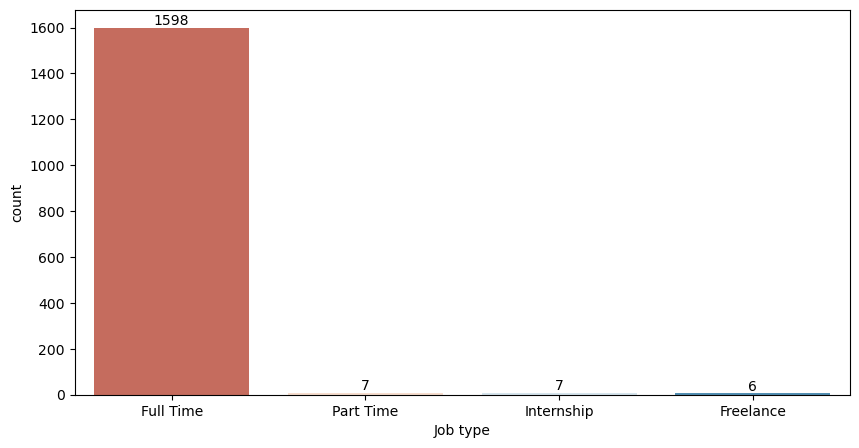

In [60]:
plt.figure(figsize = (10,5))
graph = sns.countplot(x = 'Job type', data = data, order = data['Job type'].value_counts().index, palette = 'RdBu')

for container in graph.containers:
    graph.bar_label(container)

plt.show()

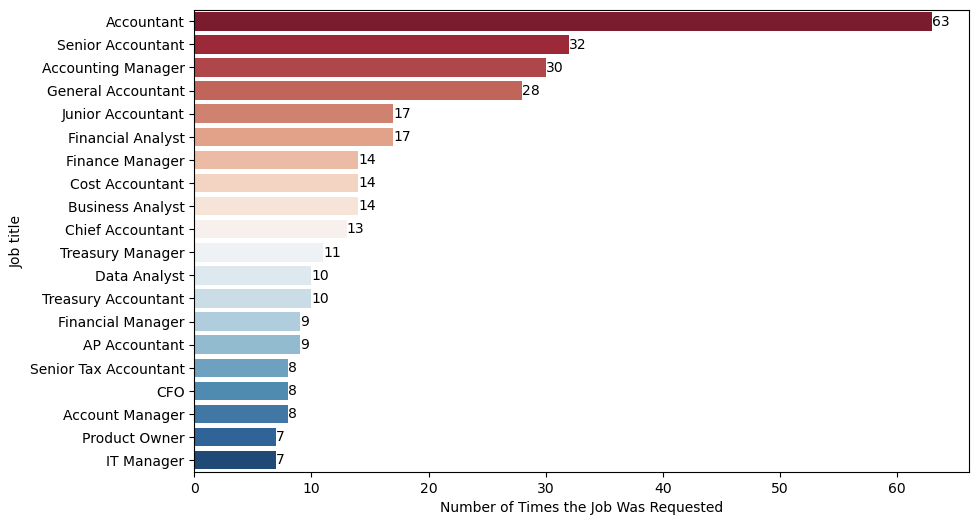

In [61]:
plt.figure(figsize = (10,6))
graph = sns.countplot(y = "Job title", data = data, order = data["Job title"].value_counts().iloc[:20].index, palette = "RdBu")
plt.xlabel('Number of Times the Job Was Requested')

for container in graph.containers:
    graph.bar_label(container)
    
plt.show() 

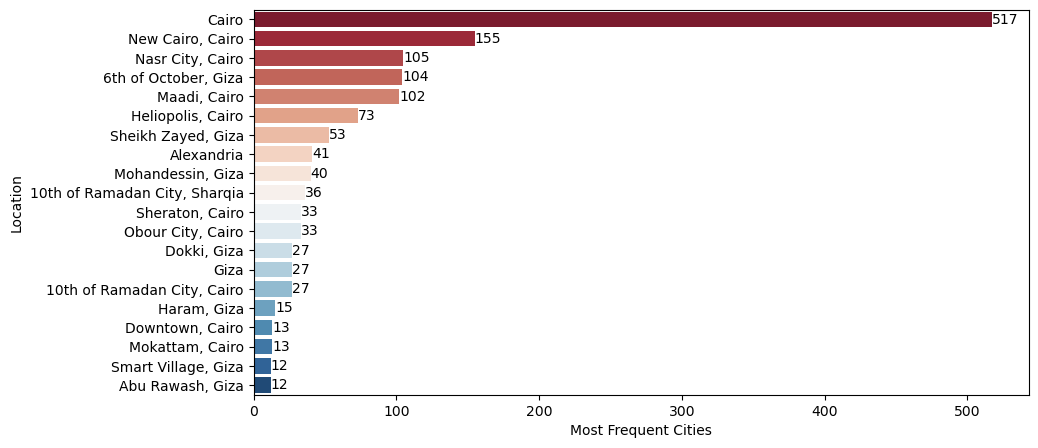

In [62]:
plt.figure(figsize = (10,5))
graph = sns.countplot(y = 'Location', data = data, order = data['Location'].value_counts().iloc[:20].index, palette = 'RdBu')
plt.xlabel("Most Frequent Cities")

for container in graph.containers:
    graph.bar_label(container)

plt.show()

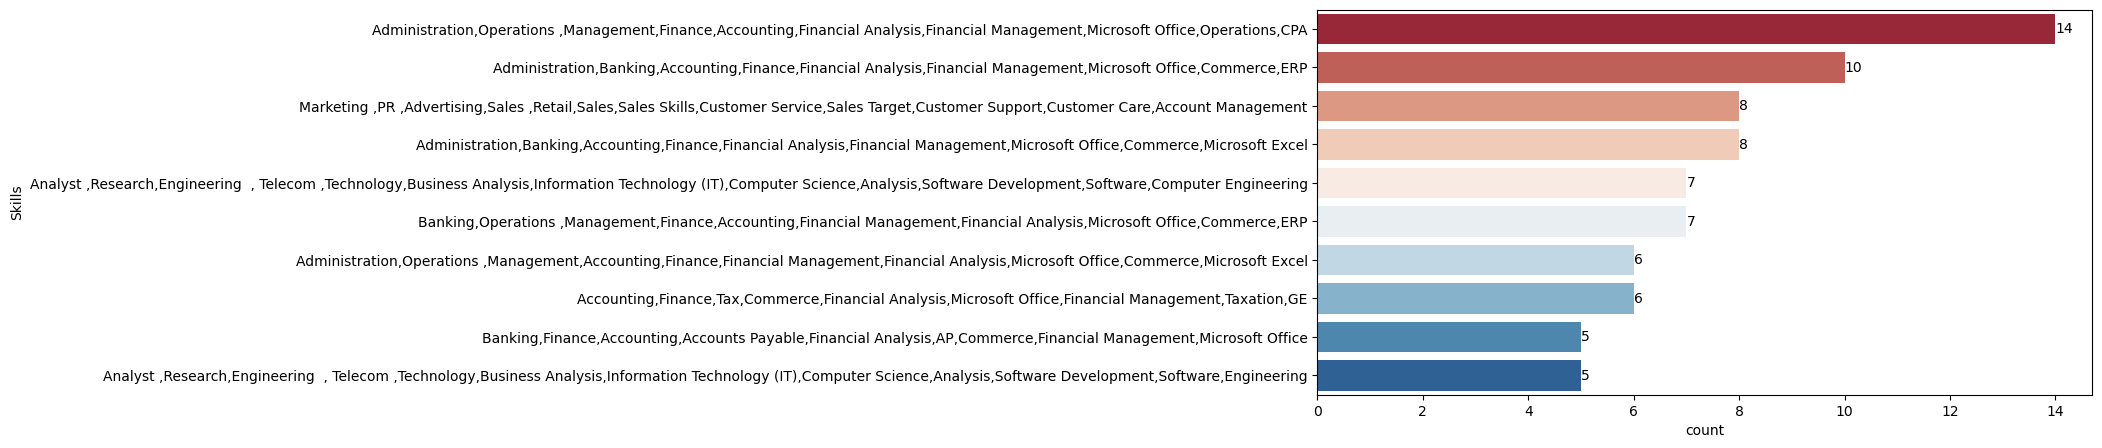

In [63]:
plt.figure(figsize = (10,5))
graph = sns.countplot(y = 'Skills', data = data, order = data['Skills'].value_counts().iloc[:10].index, palette = 'RdBu')

for container in graph.containers:
    graph.bar_label(container)

plt.show()

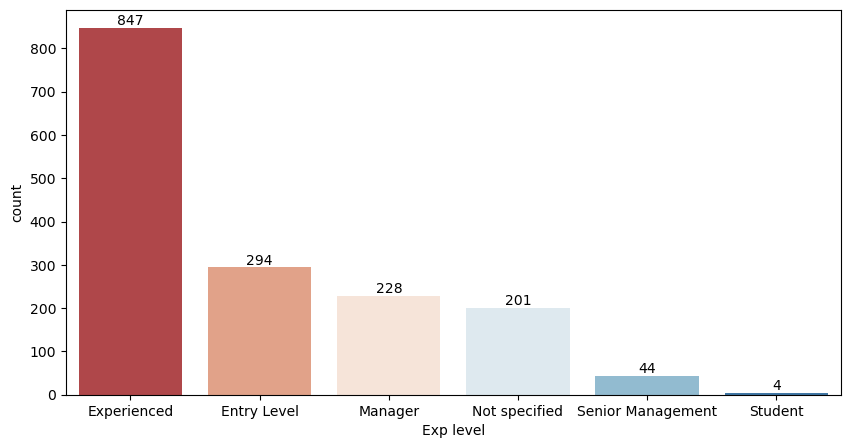

In [64]:
plt.figure(figsize = (10,5))
graph = sns.countplot(x = 'Exp level', data = data, order = data['Exp level'].value_counts().iloc[:20].index, palette = 'RdBu')

for container in graph.containers:
    graph.bar_label(container)

plt.show()

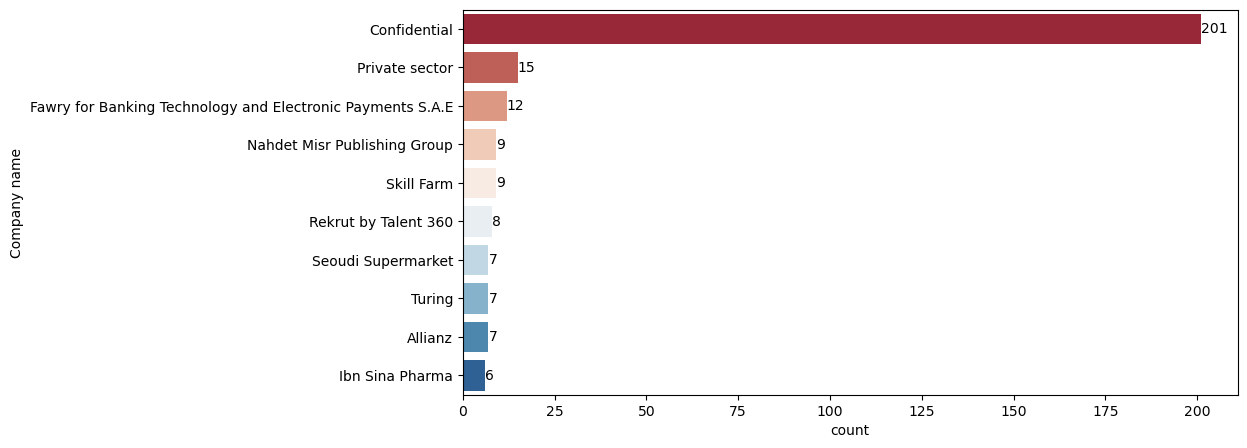

In [65]:
plt.figure(figsize = (10,5))
graph = sns.countplot(y = 'Company name', data = data, order = data['Company name'].value_counts().iloc[:10].index, palette = 'RdBu')

for container in graph.containers:
    graph.bar_label(container)

plt.show()

In [66]:
data.describe(include = object)

,Job title,Company name,Location,Job type,Exp level,Exp years,Skills
count,1618,1618,1618,1618,1618,1618,1618
unique,1015,888,85,4,6,98,1457
top,Accountant,Confidential,Cairo,Full Time,Experienced,0,"Administration,Operations ,Management,Finance,..."
freq,63,201,517,1598,847,404,14


In [67]:
def counting_skills():
    # get list of all skills
    skill_list = list(data["Skills"])
    
    # join skills and union it
    skill =  ','.join(skill_list).split(',')
    
    # create skill count dictionary
    skill_count = collections.Counter(skill)
    
    return skill_count

In [99]:
skills = pd.DataFrame(columns = ["Skill", "Count"])
skills

,Skill,Count


In [102]:
for key,value in counting_skills().items():
     skills.loc[len(skills.index)] = [key, value] 

In [103]:
skills.head(20)

,Skill,Count
0,Analyst,235
1,Research,259
2,Analysis,184
3,Business Analysis,67
4,Communication skills,93
5,Software Development,257
6,SQL,46
7,systems analysis,3
8,Accounting,487
9,Finance,1079


In [ ]:
data.to_csv("AbdulData.csv")